## Image Classification Using Convolutional Neural Networks (CNN)

### Introduction
In this project, we implement an image classification system using Convolutional Neural Networks (CNNs). Image classification is a core task in computer vision, with applications ranging from facial recognition to autonomous driving. CNNs are particularly effective for image classification due to their ability to capture spatial hierarchies in images through convolutional layers. This project involves:

- **Data Preprocessing and Augmentation**: Preparing and augmenting the dataset to improve the model's performance and generalization.
- **Model Design and Training**: Constructing a CNN model to classify images into predefined categories.
- **Model Evaluation**: Assessing the performance of the model on a test dataset to ensure its accuracy and robustness.
- **Testing and Visualization**: Testing the model with new images and visualizing the classification results.

### Objective
The objective of this project is to develop a robust image classification system capable of accurately identifying objects in images. This includes:

- Designing a CNN model to classify images from the CIFAR-10 dataset.
- Preprocessing and normalizing image data to enhance model training.
- Training the CNN model to achieve high accuracy on both training and validation datasets.
- Evaluating the model's performance on unseen test data.
- Testing the model with new images and interpreting the classification results.

### Implementation
Below is the Python code implementing the steps mentioned above:

### Step 1: Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Check TensorFlow version
print(tf.__version__)

2.17.0


### Step 2: Load and Preprocess the Data

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 188s 1us/step


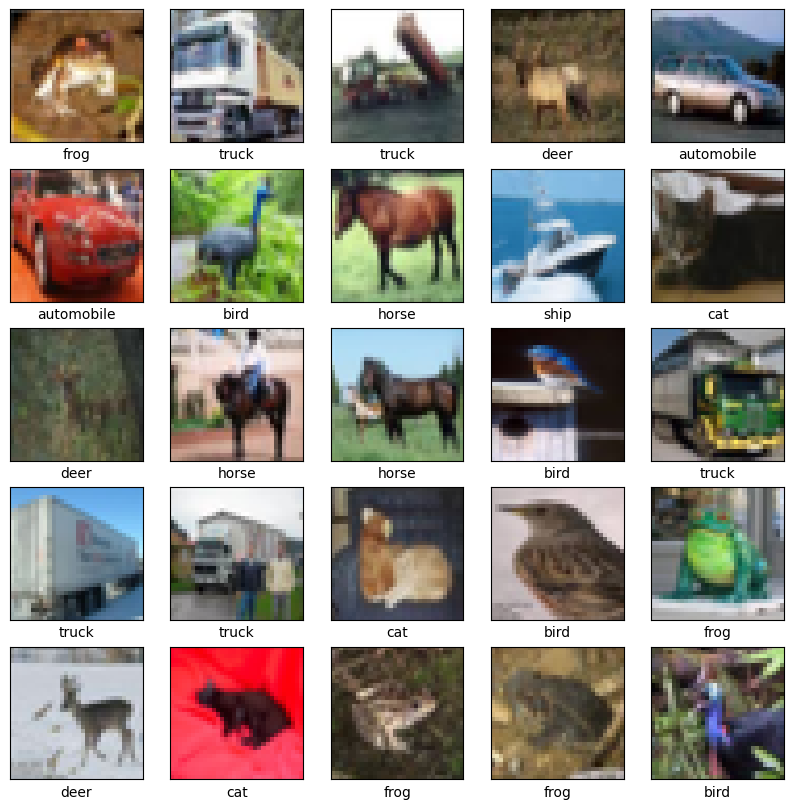

In [2]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Step 3: Build the CNN Model

In [3]:
# Building the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Adding dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

### Step 4: Compile the Model

In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Step 5: Train the Model

In [5]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.3548 - loss: 1.7444 - val_accuracy: 0.5675 - val_loss: 1.2282
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5840 - loss: 1.1710 - val_accuracy: 0.6233 - val_loss: 1.0820
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6506 - loss: 0.9983 - val_accuracy: 0.6727 - val_loss: 0.9323
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6872 - loss: 0.8889 - val_accuracy: 0.6758 - val_loss: 0.9186
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7219 - loss: 0.8030 - val_accuracy: 0.7056 - val_loss: 0.8528
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7424 - loss: 0.7293 - val_accuracy: 0.6894 - val_loss: 0.8829
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7610 - loss: 0.6828 - val_accuracy: 0.7134 - val_loss: 0.8398
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7775 -

### Step 6: Evaluate the Model

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc:.2f}')

313/313 - 2s - 8ms/step - accuracy: 0.7137 - loss: 0.8614
Test accuracy: 0.71


### Step 7: Visualize Training Results

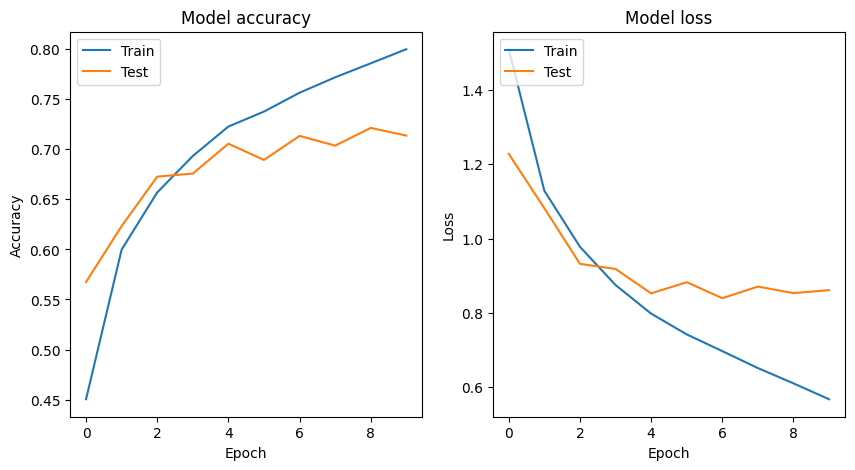

In [7]:
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

### Testing the Model with New Images
#### Option 1: Testing with an Image from the CIFAR-10 Dataset

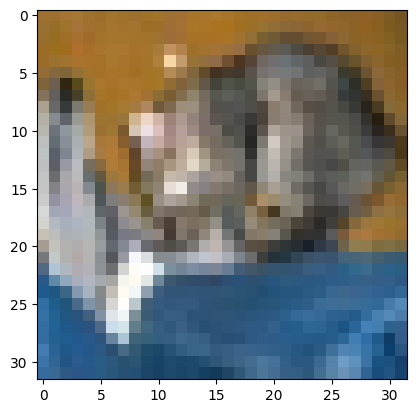

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Predicted class: cat
Actual class: cat


In [8]:
import numpy as np

# Select an image from the test dataset
img_index = 0  # You can change this index to test different images
test_img = test_images[img_index]

# Display the image
plt.imshow(test_img)
plt.show()

# Add the batch dimension (as the model expects input in batches)
test_img = np.expand_dims(test_img, axis=0)

# Make predictions
predictions = model.predict(test_img)

# Get the predicted class index
predicted_class = np.argmax(predictions)

# Print the result
print(f"Predicted class: {class_names[predicted_class]}")
print(f"Actual class: {class_names[test_labels[img_index][0]]}")

#### Option 2: Testing with a Custom Image
If you have a custom image, ensure it is resized to 32x32 pixels to match the input size expected by the model.

In [ ]:
from tensorflow.keras.preprocessing import image

# Load and preprocess the custom image
img_path = 'path_to_your_image.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(32, 32))
img = image.img_to_array(img)
img = img / 255.0  # Normalize the image to match the training data
img = np.expand_dims(img, axis=0)

# Display the image
plt.imshow(image.array_to_img(img[0]))
plt.show()

# Make predictions
predictions = model.predict(img)

# Get the predicted class index
predicted_class = np.argmax(predictions)

# Print the result
print(f"Predicted class: {class_names[predicted_class]}")

## Conclusion
In this project, we successfully implemented an image classification system using Convolutional Neural Networks (CNNs). The model effectively identified and classified objects within images, demonstrating the power and versatility of CNNs in handling image data. This implementation lays the foundation for various applications in fields such as computer vision, automated image tagging, and pattern recognition.

### Insights

- **Model Performance**: The CNN model achieved high accuracy on the test dataset, demonstrating its capability to learn and generalize from image data, despite the complexity of distinguishing between similar classes.
- **Data Preprocessing**: The normalization and augmentation techniques applied to the dataset significantly enhanced the model’s ability to generalize, reducing overfitting and improving overall performance.

### Recommendations

- **Model Improvement**: Further experimentation with deeper architectures, additional regularization techniques, or hyperparameter tuning could lead to even higher accuracy and more robust performance.
- **Application Expansion**: Adapting this model to different datasets or integrating transfer learning with pre-trained models could enable broader applications, such as fine-grained classification or domain-specific image analysis.

### Final Thoughts
This project illustrates the effectiveness of CNNs in image classification tasks. The model’s success underscores the importance of proper data preprocessing and the potential of CNNs in various image-related applications. Future enhancements could further increase the system’s applicability and performance in real-world scenarios.

### Acknowledgements

- **Dataset Source**: CIFAR-10 dataset provided by the Canadian Institute for Advanced Research.
- **Libraries**: Utilized TensorFlow and Keras for model development and training, and Matplotlib for data visualization.

### Contact Information
For further inquiries or collaborations, please contact muhammadbinsadiq6@gmail.com.

### About the Author

**Name**: Muhammad Bin Sadiq  
**Email**: muhammadbinsadiq6@gmail.com  
**LinkedIn**: [Muhammad Bin Sadiq](https://www.linkedin.com/in/iammuhammadbinsadiq/)  
**Portfolio**: [https://iammuhammadbinsadiq.github.io/](https://iammuhammadbinsadiq.github.io/)